### Import Dependencies

 This is an example of missspelled items where the wron g words are highlighted in reeed

In [1]:
import pandas as pd
import numpy as np
import sqlite3

### Connect to Database

In [2]:
conn = sqlite3.connect(r"movielense20million.db")
c = conn.cursor()

### Model #1: 10k

In [3]:
model110k = pd.read_csv('10kmodel1.csv')

In [4]:
model110k.head()

,movieId,userId,tagId,relevance,rating
0,2,1,1,0.03975,3.5
1,2,1,2,0.04375,3.5
2,2,1,3,0.03775,3.5
3,2,1,4,0.04800,3.5
4,2,1,5,0.11025,3.5


In [5]:
model110k = model110k.pivot_table(index = ['userId','movieId','rating'], columns='tagId', values = 'relevance')

In [6]:
model110k

tagId                     1        2        3        4        5        6     \
userId movieId rating                                                         
1      2       3.5     0.03975  0.04375  0.03775  0.04800  0.11025  0.07250   
2      3       4.0     0.04350  0.05475  0.02800  0.07700  0.05400  0.06850   
3      1       4.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
4      6       3.0     0.02825  0.02550  0.01850  0.04550  0.09575  0.05500   
5      2       3.0     0.03975  0.04375  0.03775  0.04800  0.11025  0.07250   
6      1       5.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       3       3.0     0.04350  0.05475  0.02800  0.07700  0.05400  0.06850   
       7       5.0     0.04575  0.05275  0.16675  0.08275  0.11450  0.15625   
7      3       3.0     0.04350  0.05475  0.02800  0.07700  0.05400  0.06850   
       7       3.0     0.04575  0.05275  0.16675  0.08275  0.11450  0.15625   
8      1       4.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       3       5.0     0.04350  0.05475  0.02800  0.07700  0.05400  0.06850   
       6       3.0     0.02825  0.02550  0.01850  0.04550  0.09575  0.05500   
10     1       4.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
11     1       4.5     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
12     1       4.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       3       3.0     0.04350  0.05475  0.02800  0.07700  0.05400  0.06850   
       5       2.0     0.04200  0.05275  0.05925  0.03675  0.07525  0.12525   
       6       3.0     0.02825  0.02550  0.01850  0.04550  0.09575  0.05500   
       7       3.0     0.04575  0.05275  0.16675  0.08275  0.11450  0.15625   
13     1       4.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       2       3.0     0.03975  0.04375  0.03775  0.04800  0.11025  0.07250   
14     1       4.5     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       7       3.5     0.04575  0.05275  0.16675  0.08275  0.11450  0.15625   
16     1       3.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       6       3.0     0.02825  0.02550  0.01850  0.04550  0.09575  0.05500   
17     6       4.0     0.02825  0.02550  0.01850  0.04550  0.09575  0.05500   
19     1       5.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       3       4.0     0.04350  0.05475  0.02800  0.07700  0.05400  0.06850   
       6       5.0     0.02825  0.02550  0.01850  0.04550  0.09575  0.05500   
...                        ...      ...      ...      ...      ...      ...   
138456 2       3.0     0.03975  0.04375  0.03775  0.04800  0.11025  0.07250   
138459 1       2.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
138464 1       4.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       2       3.0     0.03975  0.04375  0.03775  0.04800  0.11025  0.07250   
138467 1       4.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       3       2.0     0.04350  0.05475  0.02800  0.07700  0.05400  0.06850   
138471 1       4.5     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       5       2.0     0.04200  0.05275  0.05925  0.03675  0.07525  0.12525   
138472 1       3.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
138473 1       4.5     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
138474 1       5.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       2       4.0     0.03975  0.04375  0.03775  0.04800  0.11025  0.07250   
       5       4.0     0.04200  0.05275  0.05925  0.03675  0.07525  0.12525   
       6       5.0     0.02825  0.02550  0.01850  0.04550  0.09575  0.05500   
       9       4.0     0.03500  0.04050  0.01825  0.01800  0.03650  0.01750   
138477 1       3.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
138480 1       4.0     0.02500  0.02500  0.05775  0.09675  0.14675  0.21700   
       3       3.0     0.04350  0.05475  0.02800  

In [7]:
model110k = model110k.reset_index()

In [8]:
model110k

tagId,userId,movieId,rating,1,2,3,4,5,6,7,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,1,2,3.5,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
1,2,3,4.0,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
2,3,1,4.0,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
3,4,6,3.0,0.02825,0.02550,0.01850,0.04550,0.09575,0.05500,0.04400,...,0.04900,0.01825,0.02075,0.06000,0.29975,0.15525,0.03525,0.01950,0.06650,0.01900
4,5,2,3.0,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
5,6,1,5.0,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
6,6,3,3.0,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
7,6,7,5.0,0.04575,0.05275,0.16675,0.08275,0.11450,0.15625,0.05025,...,0.03750,0.02825,0.01200,0.03575,0.13000,0.04875,0.01975,0.01050,0.10925,0.01850
8,7,3,3.0,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
9,7,7,3.0,0.04575,0.05275,0.16675,0.08275,0.11450,0.15625,0.05025,...,0.03750,0.02825,0.01200,0.03575,0.13000,0.04875,0.01975,0.01050,0.10925,0.01850


In [9]:
#features = model110k.iloc[4:]
features = model110k.iloc[:,3:]
features

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
1,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
2,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
3,0.02825,0.02550,0.01850,0.04550,0.09575,0.05500,0.04400,0.24200,0.12850,0.02550,...,0.04900,0.01825,0.02075,0.06000,0.29975,0.15525,0.03525,0.01950,0.06650,0.01900
4,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
5,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
6,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
7,0.04575,0.05275,0.16675,0.08275,0.11450,0.15625,0.05025,0.11175,0.03950,0.08000,...,0.03750,0.02825,0.01200,0.03575,0.13000,0.04875,0.01975,0.01050,0.10925,0.01850
8,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
9,0.04575,0.05275,0.16675,0.08275,0.11450,0.15625,0.05025,0.11175,0.03950,0.08000,...,0.03750,0.02825,0.01200,0.03575,0.13000,0.04875,0.01975,0.01050,0.10925,0.01850


In [10]:
#features.dropna()


In [11]:
ratings = model110k.rating
ratings

0         3.5
1         4.0
2         4.0
3         3.0
4         3.0
5         5.0
6         3.0
7         5.0
8         3.0
9         3.0
10        4.0
11        5.0
12        3.0
13        4.0
14        4.5
15        4.0
16        3.0
17        2.0
18        3.0
19        3.0
20        4.0
21        3.0
22        4.5
23        3.5
24        3.0
25        3.0
26        4.0
27        5.0
28        4.0
29        5.0
         ... 
141795    3.0
141796    2.0
141797    4.0
141798    3.0
141799    4.0
141800    2.0
141801    4.5
141802    2.0
141803    3.0
141804    4.5
141805    5.0
141806    4.0
141807    4.0
141808    5.0
141809    4.0
141810    3.0
141811    4.0
141812    3.0
141813    4.0
141814    4.0
141815    3.0
141816    3.0
141817    4.0
141818    5.0
141819    5.0
141820    3.0
141821    3.0
141822    2.0
141823    3.5
141824    4.0
Name: rating, Length: 141825, dtype: float64

### Model #1: 100k

I used the export function in SQLiteStudio to export the same query as above with a LIMIT of 100k. 

In [12]:
#model1 = pd.read_csv('100kmodel1.csv')

In [13]:
#model1.head()

In [14]:
#model1 = model1v2.pivot_table(index = ['userId','movieId','rating'], columns='tagId', values = 'relevance')

In [15]:
#model1

In [16]:
#model1v2[[10]]

In [17]:
#model1 = model1.reset_index()

In [18]:
#model1

# Model #1

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
features.dropna(how = 'any')

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
1,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
2,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
3,0.02825,0.02550,0.01850,0.04550,0.09575,0.05500,0.04400,0.24200,0.12850,0.02550,...,0.04900,0.01825,0.02075,0.06000,0.29975,0.15525,0.03525,0.01950,0.06650,0.01900
4,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
5,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
6,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
7,0.04575,0.05275,0.16675,0.08275,0.11450,0.15625,0.05025,0.11175,0.03950,0.08000,...,0.03750,0.02825,0.01200,0.03575,0.13000,0.04875,0.01975,0.01050,0.10925,0.01850
8,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
9,0.04575,0.05275,0.16675,0.08275,0.11450,0.15625,0.05025,0.11175,0.03950,0.08000,...,0.03750,0.02825,0.01200,0.03575,0.13000,0.04875,0.01975,0.01050,0.10925,0.01850


In [21]:
features.isnull().sum().sum()

601920

In [22]:
featuresnona = features.dropna(axis=1, how='any')

In [23]:
features.isnull().sum().sum()

601920

In [24]:
regr = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(featuresnona, ratings, test_size=0.3, random_state=42)

In [56]:
#column 481 has the most influence on the regression model.
regr.coef_.argmax()

481

(array([  1.,   0.,   0.,   1.,   3.,   4.,   4.,  15.,  23.,  30.,  53.,
        137., 500.,  99.,  39.,  27.,  10.,  10.,   7.,   6.,   2.,   3.,
          0.,   0.,   2.]),
 array([-1.33281062e+12, -1.22579481e+12, -1.11877899e+12, -1.01176317e+12,
        -9.04747356e+11, -7.97731539e+11, -6.90715723e+11, -5.83699906e+11,
        -4.76684090e+11, -3.69668273e+11, -2.62652457e+11, -1.55636640e+11,
        -4.86208237e+10,  5.83949928e+10,  1.65410809e+11,  2.72426626e+11,
         3.79442442e+11,  4.86458259e+11,  5.93474075e+11,  7.00489892e+11,
         8.07505708e+11,  9.14521525e+11,  1.02153734e+12,  1.12855316e+12,
         1.23556897e+12,  1.34258479e+12]),
 <a list of 25 Patch objects>)

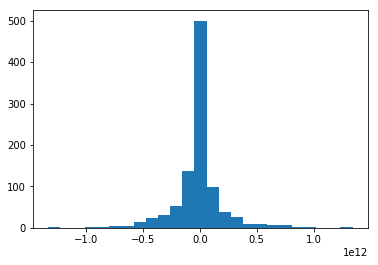

In [55]:
import matplotlib.pyplot as plt
% matplotlib inline 

plt.hist(regr.coef_, bins = 25)

In [27]:
# Train the model using the training sets
regr.fit(X_train, y_train)

print("fit ran correctly")

"""
# Make predictions using the testing set
movies_y_pred = regr.predict(X_test)

accuracy_score(y_test, movies_y_pred, normalize=False)
"""

fit ran correctly


'\n# Make predictions using the testing set\nmovies_y_pred = regr.predict(X_test)\n\naccuracy_score(y_test, movies_y_pred, normalize=False)\n'

In [38]:
X_train.shape

(99277, 976)

In [45]:
features.head(1)


tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,0.03975,0.04375,0.03775,0.048,0.11025,0.0725,0.04775,0.10975,0.09925,0.0205,...,0.04175,0.01925,0.01725,0.02425,0.1255,0.0225,0.0155,0.01475,0.09025,0.01875


In [53]:
featuresnona.head(1)

tagId,1,2,3,4,5,6,7,8,9,10,...,967,968,969,970,971,972,973,974,975,976
0,0.03975,0.04375,0.03775,0.048,0.11025,0.0725,0.04775,0.10975,0.09925,0.0205,...,0.1785,0.07725,0.20425,0.071,0.588,0.3165,0.0695,0.0725,0.00875,0.00525


In [54]:
regr.predict(featuresnona.head(1))

array([3.2131958])

In [57]:
featuresnona.shape

(141825, 976)

In [59]:
highmovie = np.zeros(shape = (976,))

In [65]:
highmovie[480] = 1
highmovie.sum()
highmovie = np.array([highmovie])

In [66]:
regr.predict(highmovie)

array([9.08522333e+11])

In [28]:
regr.score(X_test,y_test)

0.13687395371126376

In [29]:
#from sklearn.ensemble import RandomForestClassifier

#clf = RandomForestClassifier(max_depth=2, random_state=0)

#clf.fit(X_train, y_train)



In [30]:
print("hello")

hello


### Model #2

In [31]:
model2 = pd.read_sql_query("""SELECT userId, 
movie2id,
rating


FROM ratings  


ORDER BY userId ASC

LIMIT 1000000;""", conn)

In [32]:
model2.head(20)

,userId,movie2Id,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


In [33]:
model2 = model2.astype(float)

In [34]:
model2 = model2.pivot_table(index = ['userId'], columns='movie2Id', values = 'rating')
model2.head()

movie2Id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,129350.0,129354.0,129428.0,129707.0,130052.0,130073.0,130219.0,130462.0,130490.0,130642.0
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
model2 = model2.reset_index()

In [36]:
model2

movie2Id,userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,129350.0,129354.0,129428.0,129707.0,130052.0,130073.0,130219.0,130462.0,130490.0,130642.0
0,1.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,5.0,NaN,3.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,4.0,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
model2 = model2.fillna(0)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)